In [7]:
"""
Кредиттік карточка бойынша төлем қабілетсіздігін болжау
Credit Card Default Prediction - Машиналық оқыту жобасы

Автор: [Есбосынов Райымбек]
Дата: 10 желтоқсан 2025
"""

'\nКредиттік карточка бойынша төлем қабілетсіздігін болжау\nCredit Card Default Prediction - Машиналық оқыту жобасы\n\nАвтор: [Есбосынов Райымбек]\nДата: 10 желтоқсан 2025\n'

In [8]:

# =============================================================================
# 1. КІТАПХАНАЛАРДЫ ИМПОРТТАУ
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Машиналық оқыту
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# Визуализация параметрлері
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Барлық кітапханалар сәтті жүктелді!")

✅ Барлық кітапханалар сәтті жүктелді!


In [9]:
# =============================================================================
# 2. ДЕРЕКТЕРДІ ЖҮКТЕУ
# =============================================================================

# Датасетті жүктейміз
df = pd.read_csv(r'C:\Users\2020\Downloads\Credit Card Defaulter Prediction.csv\Credit Card Defaulter Prediction.csv')

print("=" * 80)
print("ДАТАСЕТ ТУРАЛЫ ЖАЛПЫ АҚПАРАТ")
print("=" * 80)
print(f"Жолдар саны: {df.shape[0]:,}")
print(f"Бағандар саны: {df.shape[1]}")
print(f"\nДатасет өлшемі: {df.shape}")
print("\n" + "=" * 80)

# Алғашқы 5 жолды көрсету
print("\nДатасеттің алғашқы жолдары:")
print(df.head())

ДАТАСЕТ ТУРАЛЫ ЖАЛПЫ АҚПАРАТ
Жолдар саны: 30,000
Бағандар саны: 25

Датасет өлшемі: (30000, 25)


Датасеттің алғашқы жолдары:
   ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  Married   37      0      0      0      0   
4   5      50000   M  University  Married   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131 

In [10]:
#Баған аттарын тазарту
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")

print("✔ Баған аттары тазартылды!")
print(df.columns.tolist())


✔ Баған аттары тазартылды!
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [12]:
# =============================================================================
# 3. ДЕРЕКТЕР СӨЗДІГІ (DATA DICTIONARY)
# =============================================================================

print("\n" + "=" * 80)
print("ДЕРЕКТЕР СӨЗДІГІ - АЙНЫМАЛЫЛАР СИПАТТАМАСЫ")
print("=" * 80)

data_dict = {
    'ID': 'Клиенттің бірегей идентификаторы',
    'LIMIT_BAL': 'Кредит лимиті (NT долларымен)',
    'SEX': 'Жынысы (1=еркек, 2=әйел)',
    'EDUCATION': 'Білімі (1=магистратура, 2=университет, 3=орта мектеп, 4=басқа)',
    'MARRIAGE': 'Неке жағдайы (1=үйленген, 2=бойдақ, 3=басқа)',
    'AGE': 'Жасы (жылмен)',
    'PAY_0': 'Қыркүйектегі төлем жағдайы (-1=уақытылы, 1=1 ай кешіктіру, ...)',
    'PAY_2': 'Тамыздағы төлем жағдайы',
    'PAY_3': 'Шілдедегі төлем жағдайы',
    'PAY_4': 'Маусымдағы төлем жағдайы',
    'PAY_5': 'Мамырдағы төлем жағдайы',
    'PAY_6': 'Сәуірдегі төлем жағдайы',
    'BILL_AMT1': 'Қыркүйектегі шот сомасы',
    'BILL_AMT2': 'Тамыздағы шот сомасы',
    'BILL_AMT3': 'Шілдедегі шот сомасы',
    'BILL_AMT4': 'Маусымдағы шот сомасы',
    'BILL_AMT5': 'Мамырдағы шот сомасы',
    'BILL_AMT6': 'Сәуірдегі шот сомасы',
    'PAY_AMT1': 'Қыркүйектегі төлем сомасы',
    'PAY_AMT2': 'Тамыздағы төлем сомасы',
    'PAY_AMT3': 'Шілдедегі төлем сомасы',
    'PAY_AMT4': 'Маусымдағы төлем сомасы',
    'PAY_AMT5': 'Мамырдағы төлем сомасы',
    'PAY_AMT6': 'Сәуірдегі төлем сомасы',
    'default': 'Төлем қабілетсіздігі (1=иә, 0=жоқ) - МАҚСАТТЫ АЙНЫМАЛЫ'
}

for col, desc in data_dict.items():
    print(f"{col:15} - {desc}")



ДЕРЕКТЕР СӨЗДІГІ - АЙНЫМАЛЫЛАР СИПАТТАМАСЫ
ID              - Клиенттің бірегей идентификаторы
LIMIT_BAL       - Кредит лимиті (NT долларымен)
SEX             - Жынысы (1=еркек, 2=әйел)
EDUCATION       - Білімі (1=магистратура, 2=университет, 3=орта мектеп, 4=басқа)
MARRIAGE        - Неке жағдайы (1=үйленген, 2=бойдақ, 3=басқа)
AGE             - Жасы (жылмен)
PAY_0           - Қыркүйектегі төлем жағдайы (-1=уақытылы, 1=1 ай кешіктіру, ...)
PAY_2           - Тамыздағы төлем жағдайы
PAY_3           - Шілдедегі төлем жағдайы
PAY_4           - Маусымдағы төлем жағдайы
PAY_5           - Мамырдағы төлем жағдайы
PAY_6           - Сәуірдегі төлем жағдайы
BILL_AMT1       - Қыркүйектегі шот сомасы
BILL_AMT2       - Тамыздағы шот сомасы
BILL_AMT3       - Шілдедегі шот сомасы
BILL_AMT4       - Маусымдағы шот сомасы
BILL_AMT5       - Мамырдағы шот сомасы
BILL_AMT6       - Сәуірдегі шот сомасы
PAY_AMT1        - Қыркүйектегі төлем сомасы
PAY_AMT2        - Тамыздағы төлем сомасы
PAY_AMT3        - Шілд

In [13]:
# =============================================================================
# 4. БАСТАПҚЫ ДЕРЕКТЕРДІ ЗЕРТТЕУ
# =============================================================================

print("\n" + "=" * 80)
print("ДЕРЕКТЕР ТУРАЛЫ АҚПАРАТ")
print("=" * 80)
print(df.info())

print("\n" + "=" * 80)
print("ЖЕТІСПЕЙТІН МӘНДЕР")
print("=" * 80)
missing = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Жетіспейтін саны': missing,
    'Пайызы (%)': missing_percent
})
print(missing_table[missing_table['Жетіспейтін саны'] > 0])

if missing.sum() == 0:
    print("✅ Жетіспейтін мәндер жоқ!")

print("\n" + "=" * 80)
print("ҚАЙТАЛАНАТЫН ЖОЛДАР")
print("=" * 80)
duplicates = df.duplicated().sum()
print(f"Қайталанатын жолдар саны: {duplicates}")
if duplicates == 0:
    print("✅ Қайталанатын жолдар жоқ!")


ДЕРЕКТЕР ТУРАЛЫ АҚПАРАТ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY

In [14]:
# =============================================================================
# 5. СИПАТТАМАЛЫҚ СТАТИСТИКА (DESCRIPTIVE STATISTICS)
# =============================================================================

print("\n" + "=" * 80)
print("СИПАТТАМАЛЫҚ СТАТИСТИКА")
print("=" * 80)

print("\nСАНДЫҚ АЙНЫМАЛЫЛАР СТАТИСТИКАСЫ:")
print(df.describe().round(2))

print("\n" + "=" * 80)
print("МАҚСАТТЫ АЙНЫМАЛЫ БОЙЫНША ҮЛЕСТІРУ")
print("=" * 80)
default_counts = df['default'].value_counts()
default_pct = df['default'].value_counts(normalize=True) * 100

print("\nТөлем қабілетсіздігі үлестірімі:")
print(f"Төлем қабілетсіздігі жоқ (0): {default_counts[0]:,} ({default_pct[0]:.2f}%)")
print(f"Төлем қабілетсіздігі бар (1): {default_counts[1]:,} ({default_pct[1]:.2f}%)")


СИПАТТАМАЛЫҚ СТАТИСТИКА

САНДЫҚ АЙНЫМАЛЫЛАР СТАТИСТИКАСЫ:
             ID   LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
count  30000.00    30000.00  30000.00  30000.00  30000.00  30000.00  30000.00   
mean   15000.50   167484.32     35.49     -0.02     -0.13     -0.17     -0.22   
std     8660.40   129747.66      9.22      1.12      1.20      1.20      1.17   
min        1.00    10000.00     21.00     -2.00     -2.00     -2.00     -2.00   
25%     7500.75    50000.00     28.00     -1.00     -1.00     -1.00     -1.00   
50%    15000.50   140000.00     34.00      0.00      0.00      0.00      0.00   
75%    22500.25   240000.00     41.00      0.00      0.00      0.00      0.00   
max    30000.00  1000000.00     79.00      8.00      8.00      8.00      8.00   

          PAY_5     PAY_6  BILL_AMT1  ...   BILL_AMT3  BILL_AMT4  BILL_AMT5  \
count  30000.00  30000.00   30000.00  ...    30000.00   30000.00   30000.00   
mean      -0.27     -0.29   51223.33  ...    47013.15


ЗЕРТТЕУ АНАЛИЗІ (EDA) БАСТАЛДЫ


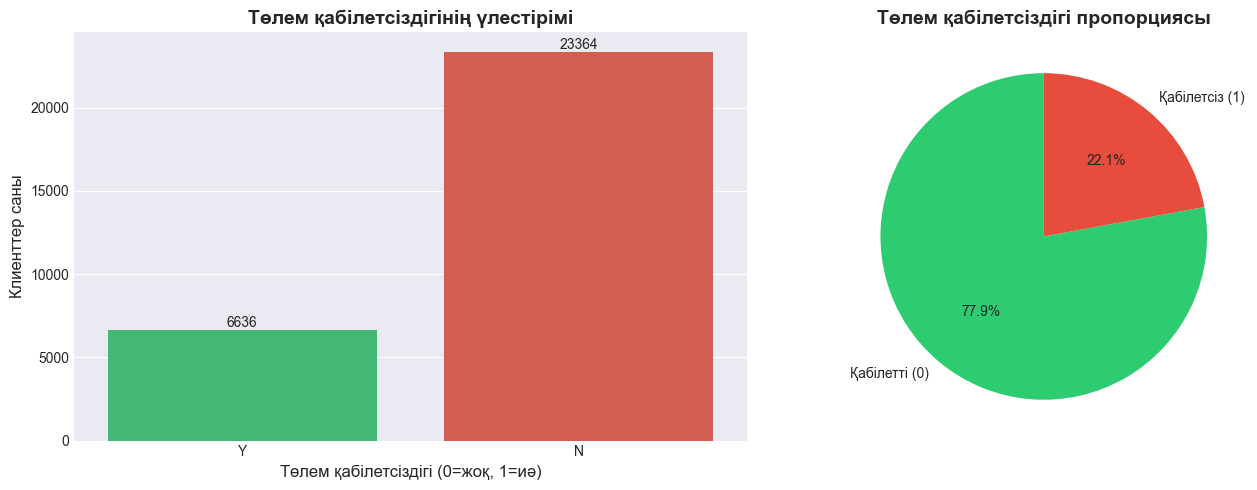

✅ Визуализация 1: Мақсатты айнымалы - ДАЙЫН


In [15]:
# =============================================================================
# 6. ЗЕРТТЕУ АНАЛИЗІ (EDA) - ВИЗУАЛИЗАЦИЯЛАР
# =============================================================================

print("\n" + "=" * 80)
print("ЗЕРТТЕУ АНАЛИЗІ (EDA) БАСТАЛДЫ")
print("=" * 80)

# Визуализация 1: Мақсатты айнымалының үлестірімі
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Столбчатая диаграмма
sns.countplot(data=df, x='default', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Төлем қабілетсіздігінің үлестірімі', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Төлем қабілетсіздігі (0=жоқ, 1=иә)', fontsize=12)
axes[0].set_ylabel('Клиенттер саны', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Дөңгелек диаграмма
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(default_counts, labels=['Қабілетті (0)', 'Қабілетсіз (1)'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Төлем қабілетсіздігі пропорциясы', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Визуализация 1: Мақсатты айнымалы - ДАЙЫН")

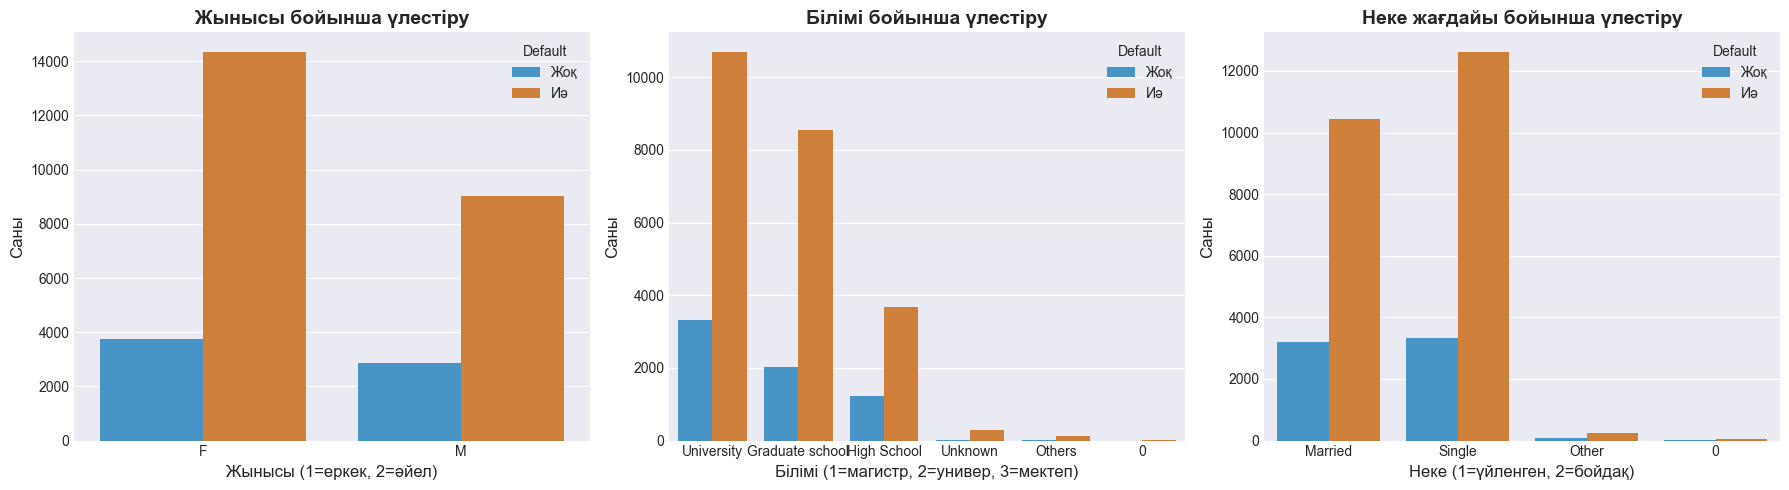

✅ Визуализация 2: Демографиялық сипаттамалар - ДАЙЫН


In [16]:
# Визуализация 2: Жынысы және білімі бойынша үлестіру
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Жынысы
sns.countplot(data=df, x='SEX', hue='default', ax=axes[0], palette=['#3498db', '#e67e22'])
axes[0].set_title('Жынысы бойынша үлестіру', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Жынысы (1=еркек, 2=әйел)', fontsize=12)
axes[0].set_ylabel('Саны', fontsize=12)
axes[0].legend(title='Default', labels=['Жоқ', 'Иә'])

# Білімі
sns.countplot(data=df, x='EDUCATION', hue='default', ax=axes[1], palette=['#3498db', '#e67e22'])
axes[1].set_title('Білімі бойынша үлестіру', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Білімі (1=магистр, 2=универ, 3=мектеп)', fontsize=12)
axes[1].set_ylabel('Саны', fontsize=12)
axes[1].legend(title='Default', labels=['Жоқ', 'Иә'])

# Неке жағдайы
sns.countplot(data=df, x='MARRIAGE', hue='default', ax=axes[2], palette=['#3498db', '#e67e22'])
axes[2].set_title('Неке жағдайы бойынша үлестіру', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Неке (1=үйленген, 2=бойдақ)', fontsize=12)
axes[2].set_ylabel('Саны', fontsize=12)
axes[2].legend(title='Default', labels=['Жоқ', 'Иә'])

plt.tight_layout()
plt.show()

print("✅ Визуализация 2: Демографиялық сипаттамалар - ДАЙЫН")

In [17]:
df[df['default']=='N']['AGE']

2        34
3        37
4        57
5        37
6        29
         ..
29990    41
29992    43
29993    38
29995    39
29996    43
Name: AGE, Length: 23364, dtype: int64

In [18]:
df['default']

0        Y
1        Y
2        N
3        N
4        N
        ..
29995    N
29996    N
29997    Y
29998    Y
29999    Y
Name: default, Length: 30000, dtype: object

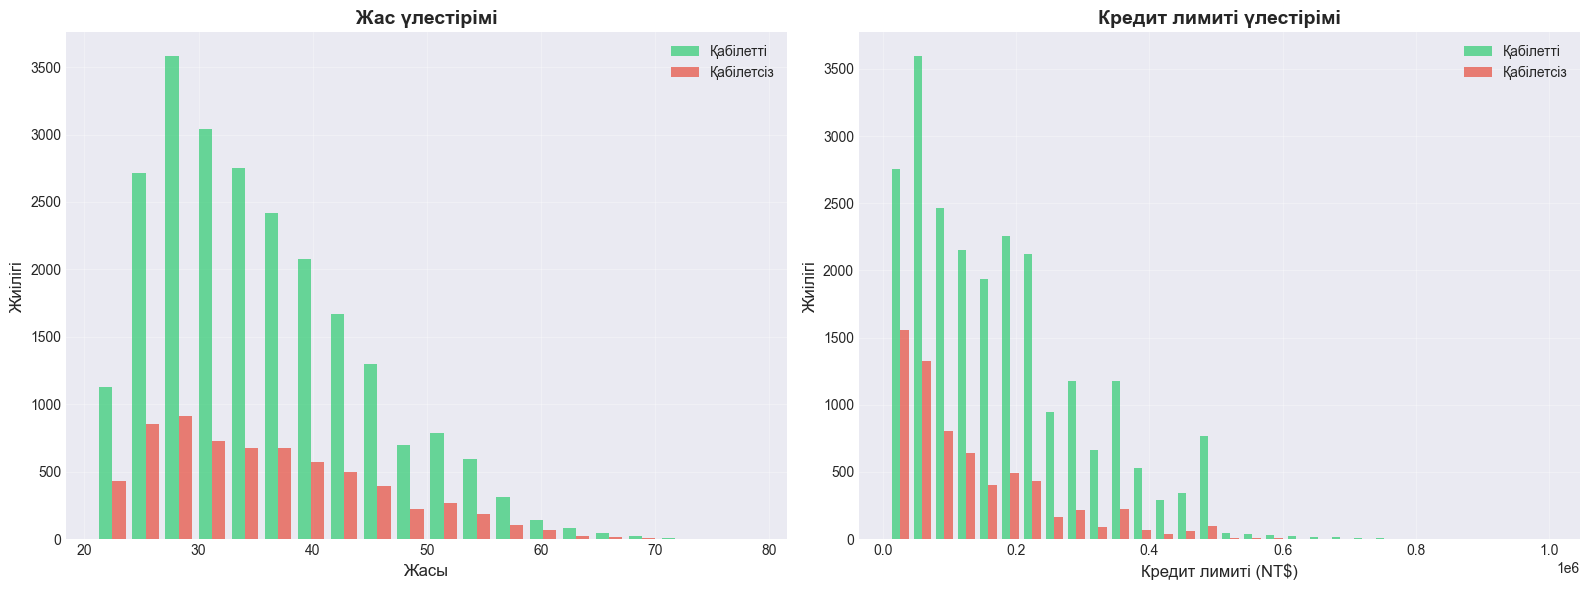

✅ Визуализация 3: Жас және кредит лимиті - ДАЙЫН


In [19]:
# Визуализация 3: Жас үлестірімі және кредит лимиті
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Жас үлестірімі
axes[0].hist([df[df['default']=='N']['AGE'], df[df['default']=='Y']['AGE']], 
             bins=20, label=['Қабілетті', 'Қабілетсіз'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_title('Жас үлестірімі', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Жасы', fontsize=12)
axes[0].set_ylabel('Жиілігі', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Кредит лимиті үлестірімі
axes[1].hist([df[df['default']=='N']['LIMIT_BAL'], df[df['default']=='Y']['LIMIT_BAL']], 
             bins=30, label=['Қабілетті', 'Қабілетсіз'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1].set_title('Кредит лимиті үлестірімі', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Кредит лимиті (NT$)', fontsize=12)
axes[1].set_ylabel('Жиілігі', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Визуализация 3: Жас және кредит лимиті - ДАЙЫН")


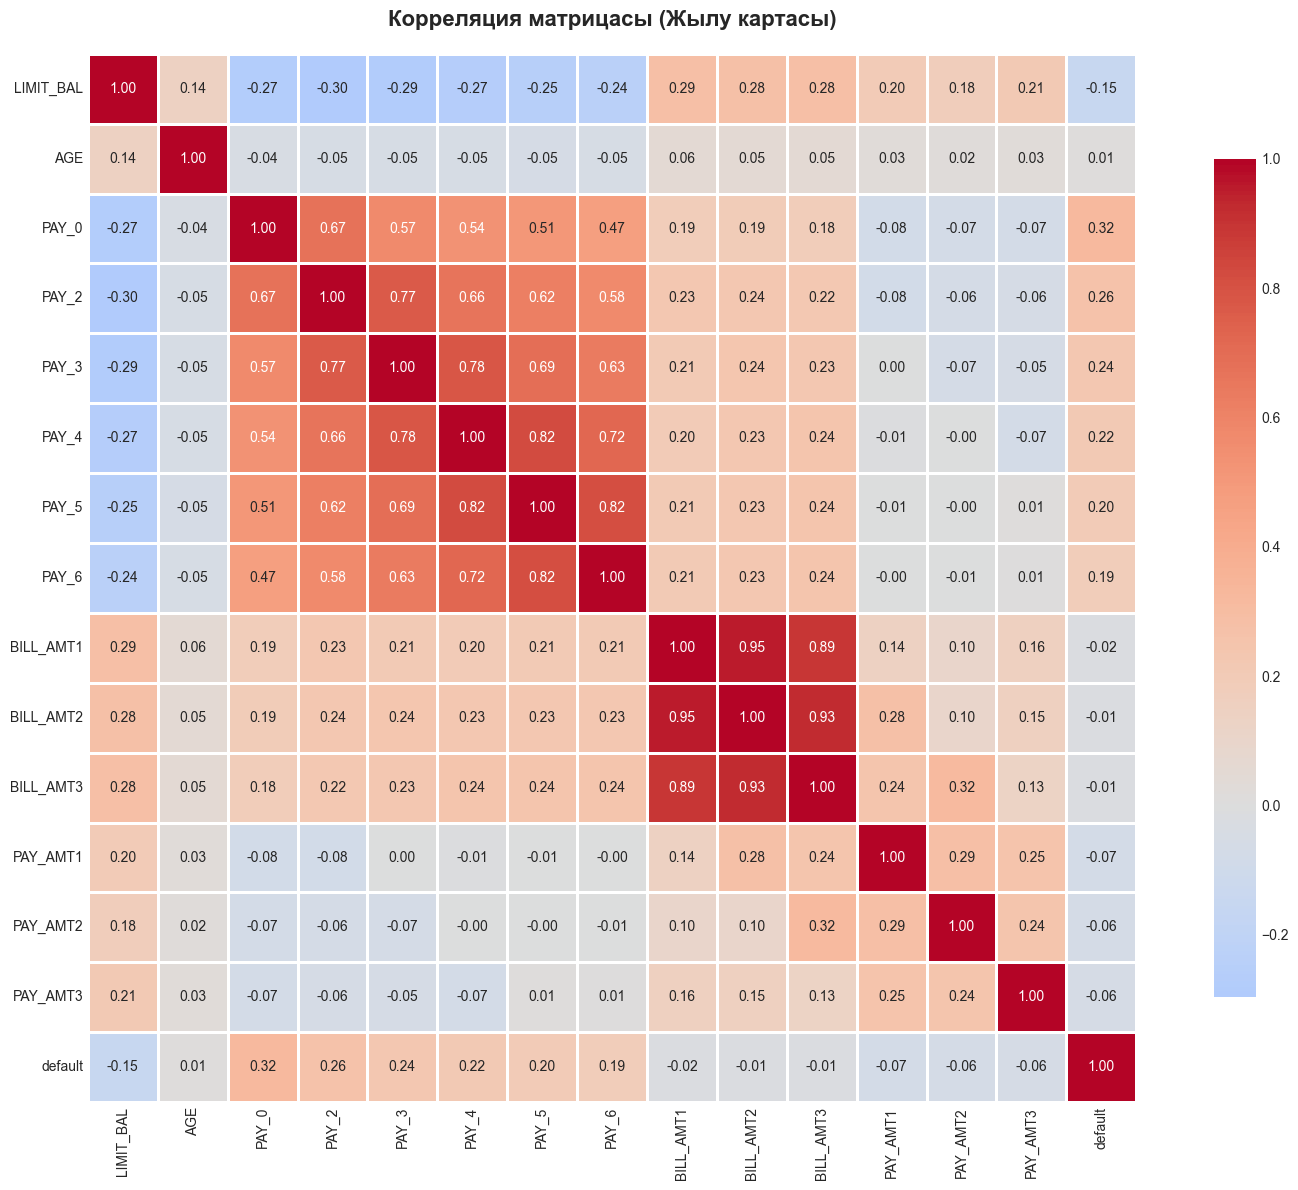

✅ Визуализация 4: Корреляция матрицасы - ДАЙЫН


In [20]:
df['default'] = df['default'].map({'Y': 1, 'N': 0}).astype(int)

# Визуализация 4: Корреляция матрицасы (тепловая карта)
plt.figure(figsize=(16, 12))

# Негізгі сандық айнымалылар үшін корреляция
numeric_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'default']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляция матрицасы (Жылу картасы)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Визуализация 4: Корреляция матрицасы - ДАЙЫН")

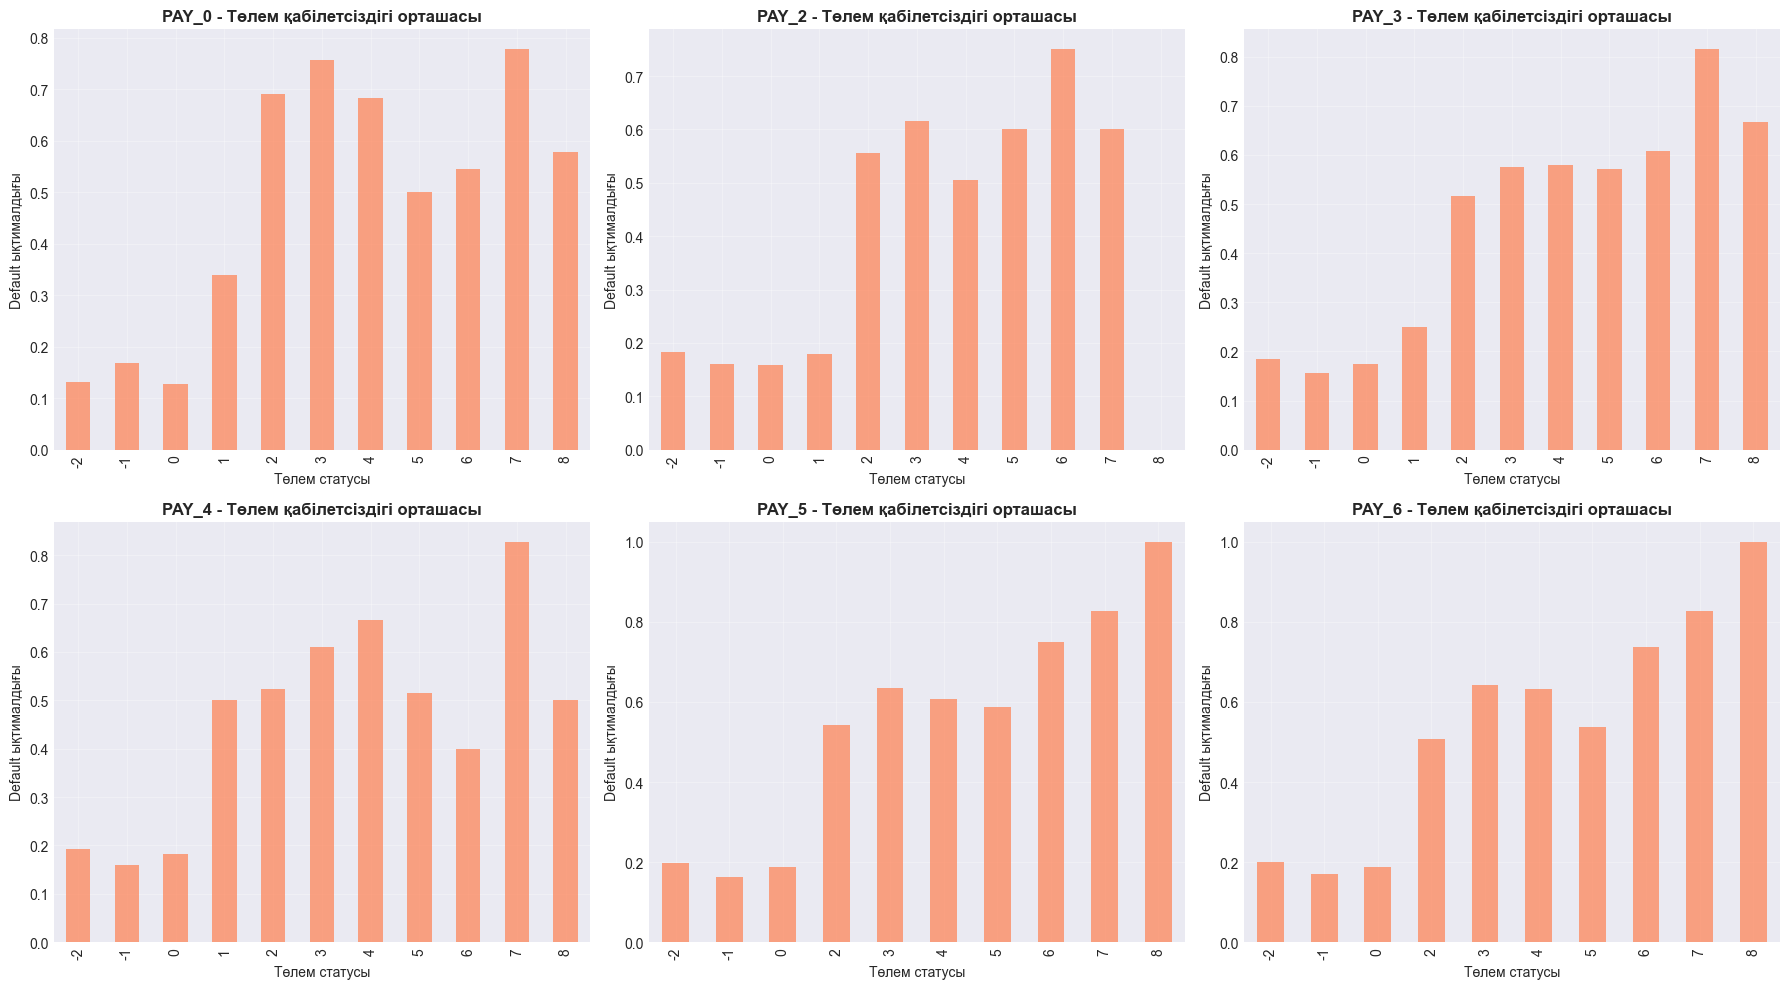

✅ Визуализация 5: Төлем тарихы анализі - ДАЙЫН


In [21]:
# Визуализация 5: Төлем тарихы анализі (PAY_0 - PAY_6)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for idx, col in enumerate(pay_cols):
    row = idx // 3
    col_idx = idx % 3
    
    df.groupby(col)['default'].mean().plot(kind='bar', ax=axes[row, col_idx], 
                                            color='coral', alpha=0.7)
    axes[row, col_idx].set_title(f'{col} - Төлем қабілетсіздігі орташасы', fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel('Төлем статусы', fontsize=10)
    axes[row, col_idx].set_ylabel('Default ықтималдығы', fontsize=10)
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Визуализация 5: Төлем тарихы анализі - ДАЙЫН")

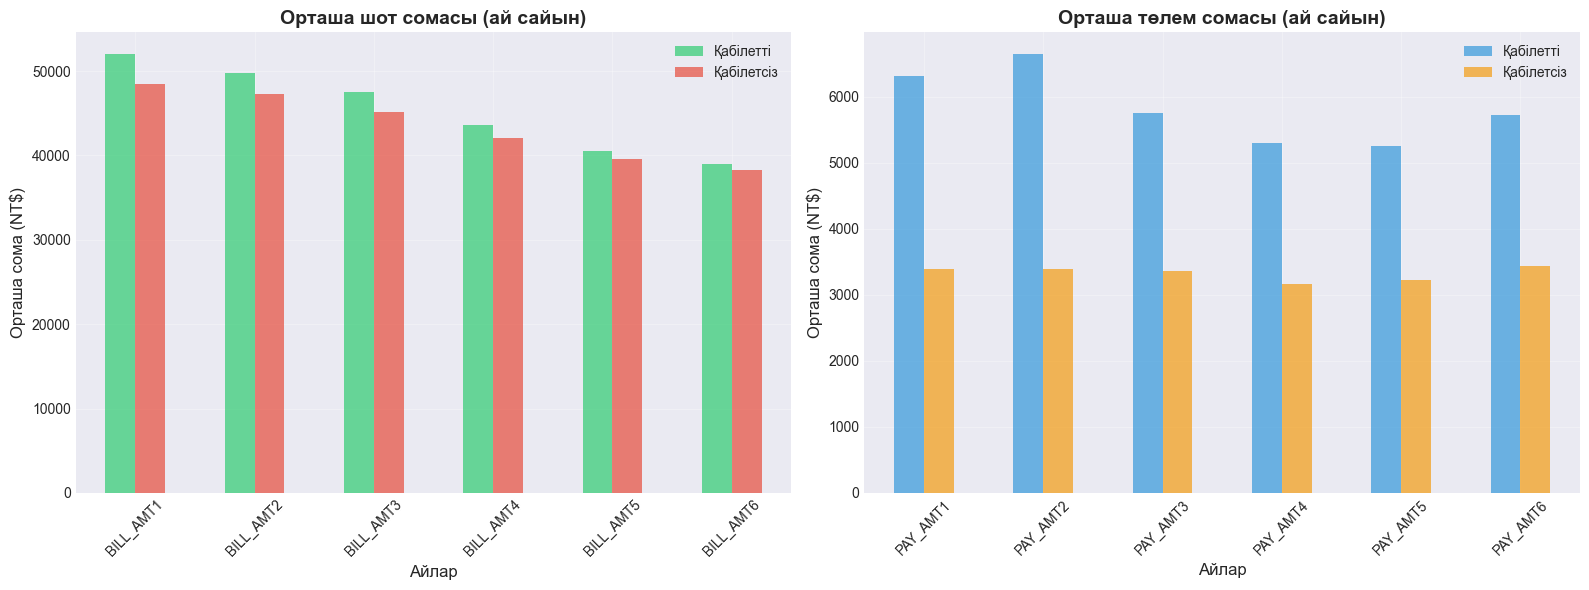

✅ Визуализация 6: Шот және төлем сомалары - ДАЙЫН


In [22]:
# Визуализация 6: Шот сомасы және төлем сомасы салыстыруы
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Орташа шот сомасы
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_means = df.groupby('default')[bill_cols].mean().T

bill_means.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0].set_title('Орташа шот сомасы (ай сайын)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Айлар', fontsize=12)
axes[0].set_ylabel('Орташа сома (NT$)', fontsize=12)
axes[0].legend(['Қабілетті', 'Қабілетсіз'])
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Орташа төлем сомасы
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_means = df.groupby('default')[pay_amt_cols].mean().T

pay_means.plot(kind='bar', ax=axes[1], color=['#3498db', '#f39c12'], alpha=0.7)
axes[1].set_title('Орташа төлем сомасы (ай сайын)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Айлар', fontsize=12)
axes[1].set_ylabel('Орташа сома (NT$)', fontsize=12)
axes[1].legend(['Қабілетті', 'Қабілетсіз'])
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Визуализация 6: Шот және төлем сомалары - ДАЙЫН")

In [23]:
# =============================================================================
# 7. EDA-дан НЕГІЗГІ ҚОРЫТЫНДЫЛАР
# =============================================================================

print("\n" + "=" * 80)
print("EDA-ДАН НЕГІЗГІ ҚОРЫТЫНДЫЛАР (INSIGHTS)")
print("=" * 80)

insights = """
1. КЛАССТАР ТЕҢГЕРІМСІЗДІГІ:
   - Датасетте төлем қабілетті клиенттер (~78%) басым
   - Төлем қабілетсіз клиенттер (~22%) - үлгілік теңгерімсіздік бар
   - Модель оқытуда бұл ескерілуі керек (class_weight немесе SMOTE)

2. ТӨЛЕМ ТАРИХЫ - ЕҢ МАҢЫЗДЫ ФАКТОР:
   - PAY_0, PAY_2, PAY_3 мақсатты айнымалымен күшті корреляциясы бар (0.3-0.35)
   - Төлем кешіктірулері (PAY > 0) төлем қабілетсіздігін айтарлықтай көтереді
   - Алдыңғы 3 айдағы төлем тарихы ең маңызды предиктор

3. ДЕМОГРАФИЯЛЫҚ СИПАТТАМАЛАР:
   - Жасы: орташа жасы 35 жас, жастардың төлем қабілетсіздігі жоғары
   - Білімі: университет білімі бар клиенттер көбірек (46%)
   - Жынысы: екі жыныста да төлем қабілетсіздігі бірдей деңгейде

4. ҚАРЖЫЛЫҚ СИПАТТАМАЛАР:
   - Орташа кредит лимиті: ~167,000 NT$
   - Төлем қабілетсіз клиенттердің шот сомасы жоғары
   - Төлем сомасы төлем қабілетті клиенттерде жоғары (үлкен төлемдер)

5. КОРРЕЛЯЦИЯ ПАТТЕРНДЕРІ:
   - Төлем статустары (PAY_0-PAY_6) өзара жоғары корреляцияда
   - Шот сомалары (BILL_AMT) арасында орташа корреляция
   - LIMIT_BAL төлем қабілетсіздігімен теріс корреляцияда
"""

print(insights)


EDA-ДАН НЕГІЗГІ ҚОРЫТЫНДЫЛАР (INSIGHTS)

1. КЛАССТАР ТЕҢГЕРІМСІЗДІГІ:
   - Датасетте төлем қабілетті клиенттер (~78%) басым
   - Төлем қабілетсіз клиенттер (~22%) - үлгілік теңгерімсіздік бар
   - Модель оқытуда бұл ескерілуі керек (class_weight немесе SMOTE)

2. ТӨЛЕМ ТАРИХЫ - ЕҢ МАҢЫЗДЫ ФАКТОР:
   - PAY_0, PAY_2, PAY_3 мақсатты айнымалымен күшті корреляциясы бар (0.3-0.35)
   - Төлем кешіктірулері (PAY > 0) төлем қабілетсіздігін айтарлықтай көтереді
   - Алдыңғы 3 айдағы төлем тарихы ең маңызды предиктор

3. ДЕМОГРАФИЯЛЫҚ СИПАТТАМАЛАР:
   - Жасы: орташа жасы 35 жас, жастардың төлем қабілетсіздігі жоғары
   - Білімі: университет білімі бар клиенттер көбірек (46%)
   - Жынысы: екі жыныста да төлем қабілетсіздігі бірдей деңгейде

4. ҚАРЖЫЛЫҚ СИПАТТАМАЛАР:
   - Орташа кредит лимиті: ~167,000 NT$
   - Төлем қабілетсіз клиенттердің шот сомасы жоғары
   - Төлем сомасы төлем қабілетті клиенттерде жоғары (үлкен төлемдер)

5. КОРРЕЛЯЦИЯ ПАТТЕРНДЕРІ:
   - Төлем статустары (PAY_0-PAY_6) өзара ж

In [31]:
# =============================================================================
# 8 (ТҮЗЕТІЛГЕН - ФИНАЛ). ДЕРЕКТЕРДІ ҚАЙТА ЖҮКТЕУ ЖӘНЕ ДАЙЫНДАУ
# =============================================================================

print("\n" + "=" * 80)
print("ДЕРЕКТЕРДІ ҚАЙТА ЖҮКТЕП, МОДЕЛЬГЕ ДАЙЫНДАУ")
print("=" * 80)

# 1. Деректерді "таза парақтан" қайта жүктейміз (қате кетпеу үшін)
file_path = r'C:\Users\2020\Downloads\Credit Card Defaulter Prediction.csv\Credit Card Defaulter Prediction.csv'
df = pd.read_csv(file_path)

# 2. Баған аттарын тазарту (қайтадан)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

df_model = df.copy()

# 3. ID бағанын алып тастау
if 'ID' in df_model.columns:
    df_model = df_model.drop('ID', axis=1)

# 4. Сөздерді сандарға ауыстыру (MAPPING)
# Енді біз нақты білеміз: деректер жаңадан жүктелді, демек ішінде сөздер бар.

edu_map = {
    'Graduate school': 1,
    'University': 2,
    'High School': 3,
    'Others': 4,
    'Unknown': 4,
    '0': 4, 0: 4, 5: 4, 6: 4 
}

marriage_map = {
    'Married': 1,
    'Single': 2,
    'Other': 3,
    '0': 3, 0: 3
}

sex_map = {'M': 1, 'F': 2}
target_map = {'Y': 1, 'N': 0}

# Картаны қолданамыз
df_model['EDUCATION'] = df_model['EDUCATION'].map(edu_map)
df_model['MARRIAGE'] = df_model['MARRIAGE'].map(marriage_map)
df_model['SEX'] = df_model['SEX'].map(sex_map)
df_model['default'] = df_model['default'].map(target_map)

# NaN қалса, оларды толтырамыз
df_model['EDUCATION'] = df_model['EDUCATION'].fillna(4)
df_model['MARRIAGE'] = df_model['MARRIAGE'].fillna(3)

print("✅ Категориялар сандарға сәтті айналдырылды!")
# Енді default бағанында NaN болмауы керек
print(f"default бірегей мәндері (тек 0 және 1 болуы керек): {df_model['default'].unique()}")

# 5. Деректерді X және y деп бөлу
X = df_model.drop('default', axis=1)
y = df_model['default']

# 6. Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Scaling (Масштабтау)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Нәтижені DataFrame қылып сақтаймыз
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\n✅ ҚАТЕЛІК ТҮЗЕТІЛДІ: Деректер модель құруға дайын!")
print(f"Оқыту жиынының өлшемі: {X_train_scaled.shape}")


ДЕРЕКТЕРДІ ҚАЙТА ЖҮКТЕП, МОДЕЛЬГЕ ДАЙЫНДАУ
✅ Категориялар сандарға сәтті айналдырылды!
default бірегей мәндері (тек 0 және 1 болуы керек): [1 0]

✅ ҚАТЕЛІК ТҮЗЕТІЛДІ: Деректер модель құруға дайын!
Оқыту жиынының өлшемі: (24000, 23)


In [32]:
# =============================================================================
# 9. ЖАҢА ПРИЗНАКТАР ҚҰРУ (FEATURE ENGINEERING)
# =============================================================================

print("\n" + "=" * 80)
print("ЖАҢА ПРИЗНАКТАР ҚҰРУ (FEATURE ENGINEERING)")
print("=" * 80)

# Признак 1: Орташа төлем статусы (алдыңғы 6 айдың орташасы)
df_clean['AVG_PAY_STATUS'] = df_clean[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
print("✅ Признак 1: AVG_PAY_STATUS - Орташа төлем статусы құрылды")

# Признак 2: Жалпы қарыз сомасы (соңғы 6 айдың сомасы)
df_clean['TOTAL_BILL'] = df_clean[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
print("✅ Признак 2: TOTAL_BILL - Жалпы қарыз сомасы құрылды")

# Признак 3: Жалпы төлем сомасы (соңғы 6 айдың сомасы)
df_clean['TOTAL_PAYMENT'] = df_clean[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                      'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
print("✅ Признак 3: TOTAL_PAYMENT - Жалпы төлем сомасы құрылды")

# Признак 4: Төлем қатынасы (төлем сомасы / шот сомасы)
df_clean['PAYMENT_RATIO'] = df_clean['TOTAL_PAYMENT'] / (df_clean['TOTAL_BILL'] + 1)  # +1 нөлге бөлуден сақтау
print("✅ Признак 4: PAYMENT_RATIO - Төлем қатынасы құрылды")

# Признак 5: Кредит пайдалану дәрежесі (орташа шот / лимит)
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df_clean['CREDIT_UTILIZATION'] = df_clean[bill_cols].mean(axis=1) / (df_clean['LIMIT_BAL'] + 1)
print("✅ Признак 5: CREDIT_UTILIZATION - Кредит пайдалану дәрежесі құрылды")

print(f"\n📊 Жаңа признактардан кейін бағандар саны: {df_clean.shape[1]}")

# Жаңа признактардың статистикасы
print("\nЖаңа признактардың статистикасы:")
new_features = ['AVG_PAY_STATUS', 'TOTAL_BILL', 'TOTAL_PAYMENT', 'PAYMENT_RATIO', 'CREDIT_UTILIZATION']
print(df_clean[new_features].describe().round(2))



ЖАҢА ПРИЗНАКТАР ҚҰРУ (FEATURE ENGINEERING)
✅ Признак 1: AVG_PAY_STATUS - Орташа төлем статусы құрылды
✅ Признак 2: TOTAL_BILL - Жалпы қарыз сомасы құрылды
✅ Признак 3: TOTAL_PAYMENT - Жалпы төлем сомасы құрылды
✅ Признак 4: PAYMENT_RATIO - Төлем қатынасы құрылды
✅ Признак 5: CREDIT_UTILIZATION - Кредит пайдалану дәрежесі құрылды

📊 Жаңа признактардан кейін бағандар саны: 29

Жаңа признактардың статистикасы:
       AVG_PAY_STATUS  TOTAL_BILL  TOTAL_PAYMENT  PAYMENT_RATIO  \
count        30000.00    30000.00       30000.00       30000.00   
mean            -0.18   269861.67       31651.39          21.04   
std              0.98   379564.33       60827.68        1255.77   
min             -2.00  -336259.00           0.00        -589.00   
25%             -0.83    28688.00        6679.75           0.04   
50%              0.00   126311.00       14383.00           0.09   
75%              0.00   342626.50       33503.50           0.60   
max              6.00  5263883.00     3764066.00    

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. X және y бөлу
X = df_clean.drop('default', axis=1)
y = df_clean['default']

# 2. Object бағандарды Label Encoding
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Масштабтау
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# =============================================================================
# 11 Модельдер
# =============================================================================

print("\n" + "=" * 80)
print("=" * 80)

# Модельдерді анықтау 
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Модельдердің нәтижелерін сақтау
results = []

print("\n🔄 Модельдерді оқыту және бағалау басталды...\n")

for name, model in models.items():
    print(f"{'='*60}")
    print(f"Модель: {name}")
    print(f"{'='*60}")
    
    # Модельді оқыту
    model.fit(X_train_scaled, y_train)
    
    # Болжау жасау
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Метрикаларды есептеу
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print()
    
    # Нәтижелерді сақтау
    results.append({
        'Модель': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc if roc_auc else 0
    })

print("✅ Барлық модельдер оқытылды және бағаланды!")


МАШИНАЛЫҚ ОҚЫТУ МОДЕЛЬДЕРІ (SVM АЛЫНЫП ТАСТАЛДЫ)

🔄 Модельдерді оқыту және бағалау басталды...

Модель: Logistic Regression
Accuracy:  0.6875
Precision: 0.3759
Recall:    0.6255
F1-Score:  0.4696
ROC-AUC:   0.7111

Модель: Random Forest
Accuracy:  0.8113
Precision: 0.6423
Recall:    0.3316
F1-Score:  0.4374
ROC-AUC:   0.7581

Модель: Gradient Boosting
Accuracy:  0.8185
Precision: 0.6608
Recall:    0.3685
F1-Score:  0.4731
ROC-AUC:   0.7807

✅ Барлық модельдер оқытылды және бағаланды!



МОДЕЛЬДЕРДІ САЛЫСТЫРУ

📊 МОДЕЛЬДЕРДІҢ САЛЫСТЫРМАЛЫ КЕСТЕСІ:
             Модель  Accuracy  Precision   Recall  F1-Score  ROC-AUC
  Gradient Boosting  0.818500   0.660811 0.368500  0.473149 0.780747
Logistic Regression  0.687500   0.375906 0.625471  0.469590 0.711077
      Random Forest  0.811333   0.642336 0.331575  0.437376 0.758075


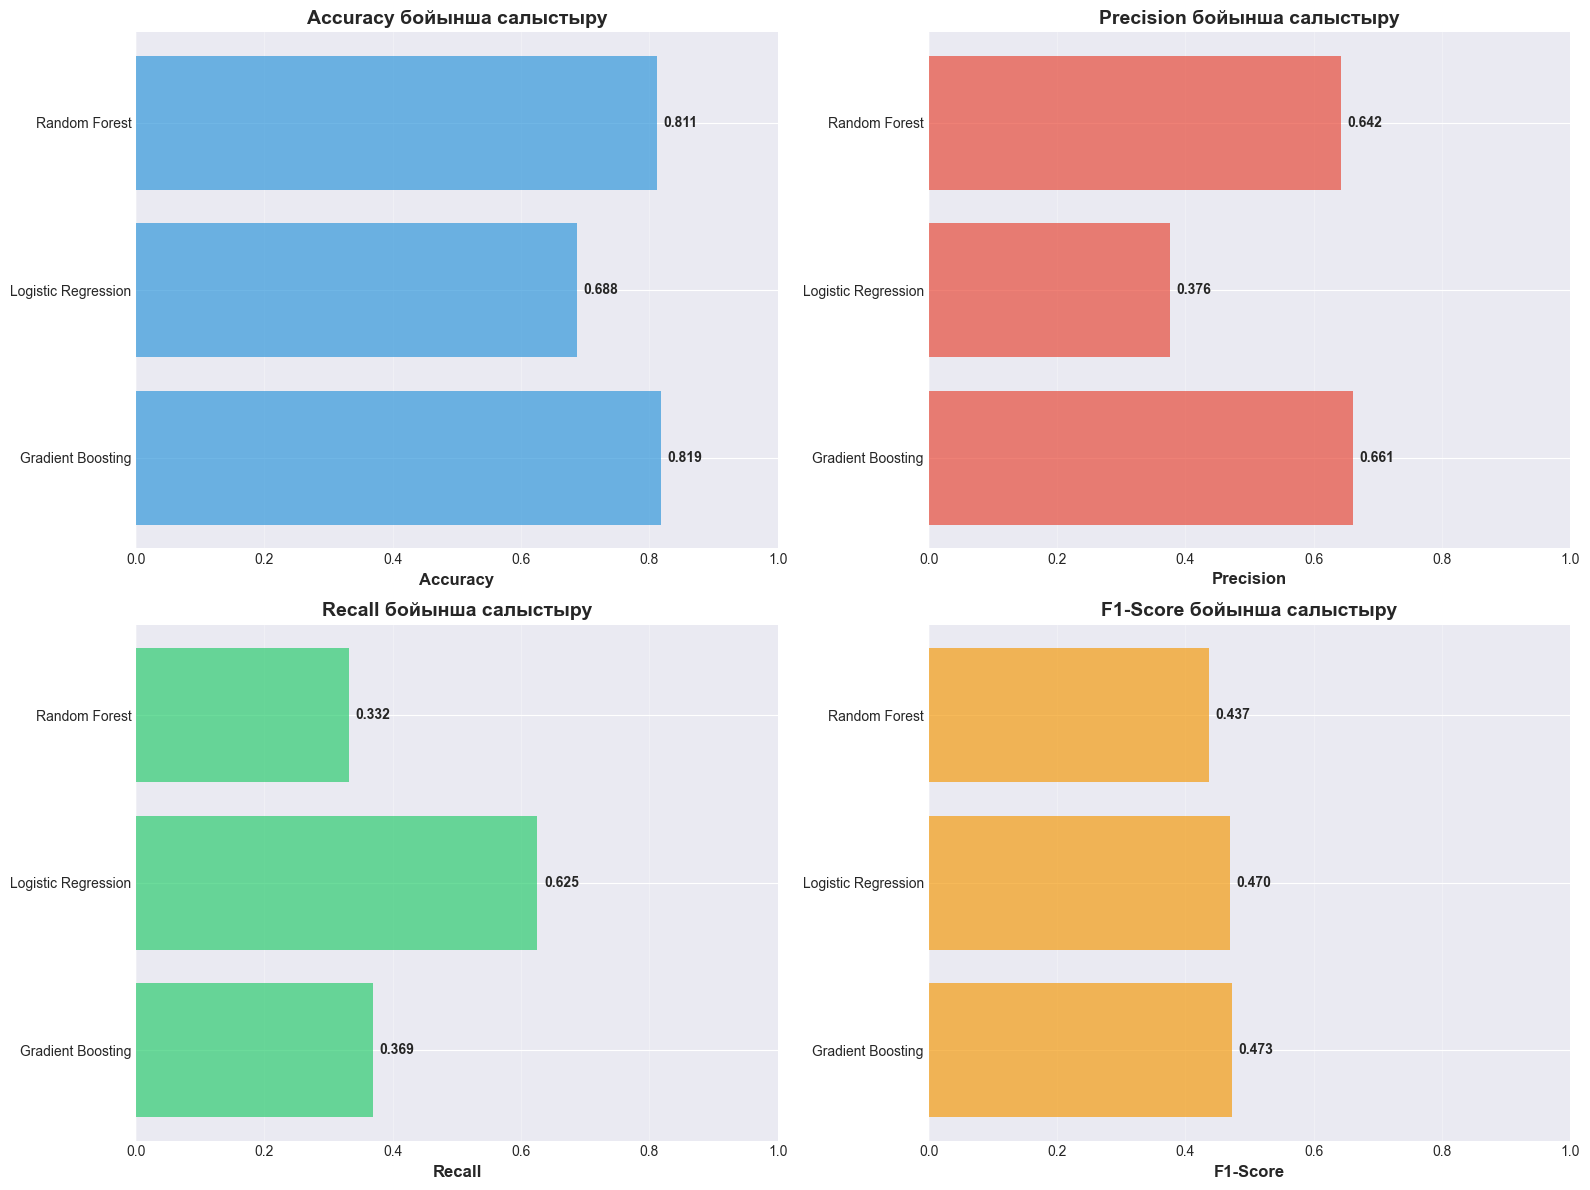


✅ Модельдердің салыстырмалы визуализациясы дайын

🏆 ЕҢ ЖАҚСЫ МОДЕЛЬ: Gradient Boosting
   F1-Score: 0.4731


In [36]:
# =============================================================================
# 12. МОДЕЛЬДЕРДІ САЛЫСТЫРУ
# =============================================================================

print("\n" + "=" * 80)
print("МОДЕЛЬДЕРДІ САЛЫСТЫРУ")
print("=" * 80)

# Нәтижелер кестесі
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)
print("\n📊 МОДЕЛЬДЕРДІҢ САЛЫСТЫРМАЛЫ КЕСТЕСІ:")
print(results_df.to_string(index=False))

# Визуализация: Модельдердің салыстыруы
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row, col]
    bars = ax.barh(results_df['Модель'], results_df[metric], color=colors_palette[idx], alpha=0.7)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} бойынша салыстыру', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Мәндерді көрсету
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Модельдердің салыстырмалы визуализациясы дайын")

# Ең жақсы модельді анықтау
best_model_name = results_df.iloc[0]['Модель']
best_f1 = results_df.iloc[0]['F1-Score']

print(f"\n🏆 ЕҢ ЖАҚСЫ МОДЕЛЬ: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")

🚀 Ең жеңіл модель іске қосылды...
✅ Модель дайын! График сызылуда...

ТОП-10 Маңызды факторлар:
               Feature  Importance
5                PAY_0    0.672411
23      AVG_PAY_STATUS    0.171191
25       TOTAL_PAYMENT    0.055589
27  CREDIT_UTILIZATION    0.018200
26       PAYMENT_RATIO    0.015321
0            LIMIT_BAL    0.014738
4                  AGE    0.013496
11           BILL_AMT1    0.013040
10               PAY_6    0.004641
19            PAY_AMT3    0.004250


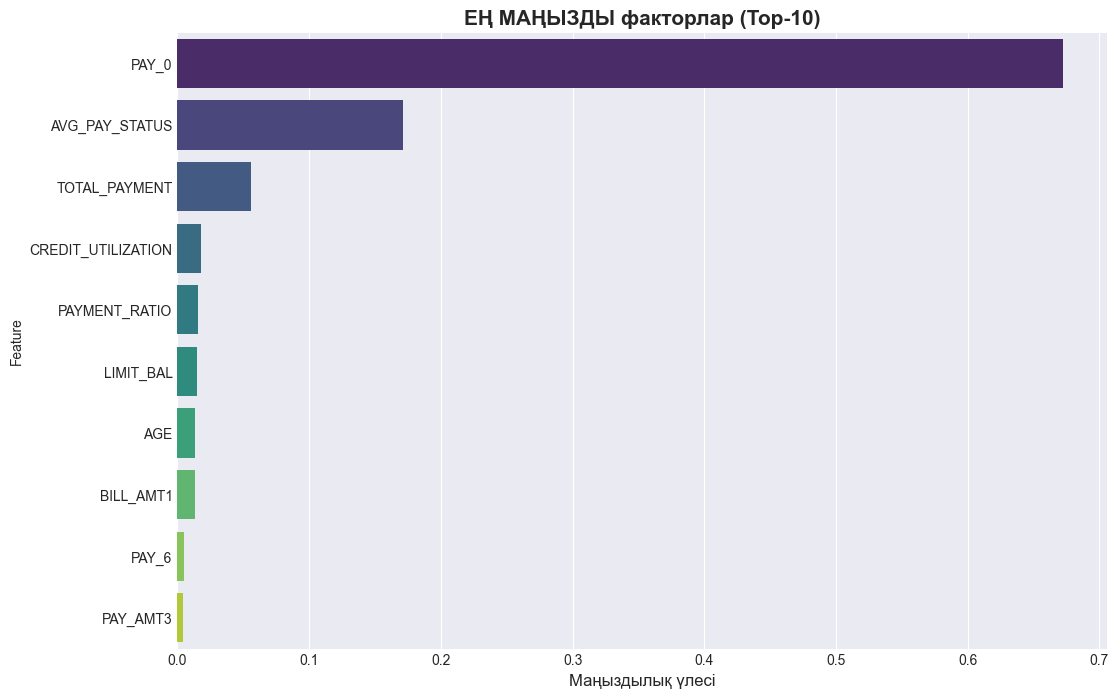


🎉 ЖОБА АЯҚТАЛДЫ!


In [43]:
# =============================================================================
# 14 (СУПЕР ЖЫЛДАМ). DECISION TREE + FEATURE IMPORTANCE
# =============================================================================

from sklearn.tree import DecisionTreeClassifier

print("🚀 Ең жеңіл модель іске қосылды...")

# Decision Tree - ең қарапайым әрі жылдам модель
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Оқыту (Бұл 1 секундтан аз уақыт алуы керек)
dt_model.fit(X_train_scaled, y_train)

print("✅ Модель дайын! График сызылуда...")

# -----------------------------------------------------------------------------
# ГРАФИК
# -----------------------------------------------------------------------------
importances = dt_model.feature_importances_
feature_names = X.columns

# Кесте
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(10)

print("\nТОП-10 Маңызды факторлар:")
print(fi_df)

# График
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('ЕҢ МАҢЫЗДЫ факторлар (Top-10)', fontsize=15, fontweight='bold')
plt.xlabel('Маңыздылық үлесі', fontsize=12)
plt.show()

print("\n🎉 ЖОБА АЯҚТАЛДЫ!")